課題の設定

'''

課題
・

ゴール

・住宅・土地統計調査のデータを使って役立ちそうな知見を見出す。

方法

・クラスタリングKmeans法を使用

参照データ

総務省統計局「住宅・土地統計調査 平成30年住宅・土地統計調査 住宅及び世帯に関する基本集計 全国・都道府県・市区町村 (44-4)」

'''

必要なライブラリーのインポート

In [8]:
import pandas as pd
import seaborn as sns
import japanize_matplotlib

In [9]:
#データセットの準備 クレンジングした参照データを使用する。
df = pd.read_csv('japan_housing_cleansing.csv')
df.head()

,Unnamed: 0,地域,世帯種,住宅所有者,世帯年収,普通世帯数,世帯人員数,住居室数,住居畳数
0,501,1100,1,1,50,13100,1.44,4.57,34.45
1,502,1100,1,1,150,46500,1.57,4.78,36.23
2,503,1100,1,1,250,84100,1.96,4.96,38.90
3,504,1100,1,1,350,71600,2.25,5.05,40.25
4,505,1100,1,1,450,55100,2.60,4.99,40.95


In [10]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,地域,世帯種,住宅所有者,世帯年収,普通世帯数,世帯人員数,住居室数,住居畳数
0,1100,1,1,50,13100,1.44,4.57,34.45
1,1100,1,1,150,46500,1.57,4.78,36.23
2,1100,1,1,250,84100,1.96,4.96,38.90
3,1100,1,1,350,71600,2.25,5.05,40.25
4,1100,1,1,450,55100,2.60,4.99,40.95


In [11]:
df.shape

(136296, 8)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X = df.to_numpy()
scaler.fit(X)

StandardScaler()

In [17]:
X_scaled = scaler.transform(X)
X_scaled

array([[-1.61233486, -1.        , -1.45791856, ...,  0.5025553 ,
         1.53694996,  1.54552801],
       [-1.61233486, -1.        , -1.45791856, ...,  0.6102862 ,
         1.63874687,  1.65877084],
       [-1.61233486, -1.        , -1.45791856, ...,  0.93347891,
         1.72600136,  1.82863509],
       ...,
       [ 1.94889447,  1.        ,  0.85464192, ..., -0.69077162,
        -0.67834467, -0.64616614],
       [ 1.94889447,  1.        ,  0.85464192, ..., -0.69077162,
        -0.67834467, -0.64616614],
       [ 1.94889447,  1.        ,  0.85464192, ..., -0.69077162,
        -0.67834467, -0.64616614]])

データセットのクラスタリング

In [19]:
from sklearn.cluster import KMeans

In [21]:
model = KMeans(n_clusters=4, random_state=0)

In [22]:
model.fit(X_scaled)

KMeans(n_clusters=4, random_state=0)

In [23]:
model.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [24]:
df['クラスター'] = model.labels_
df.head()

,地域,世帯種,住宅所有者,世帯年収,普通世帯数,世帯人員数,住居室数,住居畳数,クラスター
0,1100,1,1,50,13100,1.44,4.57,34.45,1
1,1100,1,1,150,46500,1.57,4.78,36.23,1
2,1100,1,1,250,84100,1.96,4.96,38.90,1
3,1100,1,1,350,71600,2.25,5.05,40.25,1
4,1100,1,1,450,55100,2.60,4.99,40.95,1


クラスタリング結果に対する考察

<Axes: xlabel='クラスター', ylabel='count'>

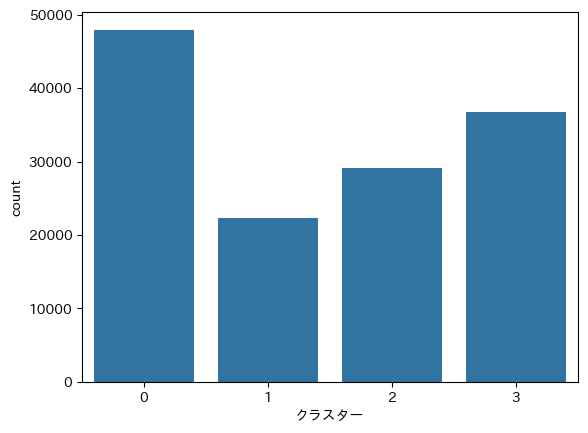

In [28]:
sns.countplot(x='クラスター', data=df)

In [29]:
df.groupby('クラスター').mean()

,地域,世帯種,住宅所有者,世帯年収,普通世帯数,世帯人員数,住居室数,住居畳数
クラスター,,,,,,,,
0,22042.906267,1.999792,14.760497,336.857357,0.000000,0.000000,0.000000,0.000000
1,22405.026751,1.000000,4.568220,713.002147,2743.229400,2.682294,4.855697,37.171356
2,22130.911196,1.692598,18.340502,1252.817795,0.105989,0.004586,0.007375,0.052574
3,21761.023437,1.000000,20.850823,377.871924,735.630330,1.453407,2.226125,14.987210


In [30]:
df.groupby('クラスター').min()

,地域,世帯種,住宅所有者,世帯年収,普通世帯数,世帯人員数,住居室数,住居畳数
クラスター,,,,,,,,
0,1100,1,1,50,0,0.0,0.0,0.0
1,1100,1,1,50,0,1.0,1.0,6.0
2,1100,1,1,850,0,0.0,0.0,0.0
3,1100,1,1,50,0,0.0,0.0,0.0


In [31]:
df.groupby('クラスター').max()

,地域,世帯種,住宅所有者,世帯年収,普通世帯数,世帯人員数,住居室数,住居畳数
クラスター,,,,,,,,
0,47362,2,24,850,0,0.0,0.00,0.00
1,47362,1,24,1500,409400,10.0,68.73,435.00
2,47362,2,24,1500,90,2.0,3.17,22.00
3,47362,1,24,1500,60200,6.0,8.00,55.13
